So far, we have use a mixture of libraries: numpy, scipy and matplotlib to build, training and analyse our models. 

Tensorflow and Pytorch deep learning frameworks which do much of the heavy lifting. E.g. we do not need to implement our own optimisation routine with these frameworks. Much boilerplat code is also available in there respective ecosystems 

Generally speaking, Pytorch lends itself well to apply DL to Natural Langauge Processing whereas Tensorflow is more suited for computer vision and non-euclidean data structures; social network graphs etc. 

In [2]:
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras import layers 
import matplotlib.pyplot as plt
import warnings
from IPython.core.interactiveshell import InteractiveShell
warnings.filterwarnings('ignore')
InteractiveShell.ast_node_interactivity = "all"
tf.random.set_seed(1)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


We will use the **functional API** of Keras; Tensorflow's  medium to high level API for building computational graphs. 

**NOTE**
If I were you I would avoid using the *sequential* method for constructing the graphs in Keras. Instead use the functional API. 

_Why?_ 

You may want to add inputs into a network that are inputted **after** the first layer; you cannot do this with the [sequential class](https://keras.io/api/models/sequential/). Hence, use the [functional one](https://keras.io/guides/functional_api/)

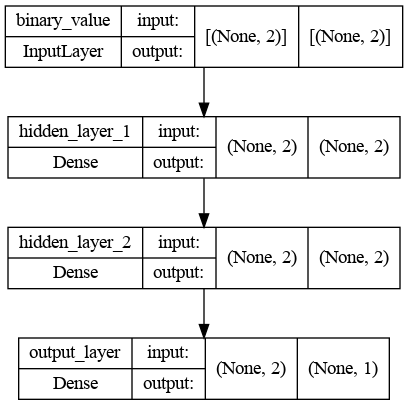

Model: "XOR_Gate_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 binary_value (InputLayer)   [(None, 2)]               0         
                                                                 
 hidden_layer_1 (Dense)      (None, 2)                 6         
                                                                 
 hidden_layer_2 (Dense)      (None, 2)                 6         
                                                                 
 output_layer (Dense)        (None, 1)                 3         
                                                                 
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________


In [8]:
def construct_model(model_name="XOR_Gate_model"):
    input_nodes = keras.Input(shape=(2,), name="binary_value")
    dense_hidden1 = layers.Dense(units=2,activation="relu", name="hidden_layer_1")(input_nodes)
    dense_hidden2 = layers.Dense(units=2,activation="relu", name="hidden_layer_2")(dense_hidden1)
    output = layers.Dense(units=1, activation="relu", name="output_layer")(dense_hidden2)
    return keras.Model(inputs=input_nodes,
                       outputs=output,
                       name=model_name)


model = construct_model()
model_name="XOR_Gate_model"

keras.utils.plot_model(model,
                       f"media/{model_name}_diagram.png",
                      show_shapes=True)

model.summary()

In [9]:
LR = 0.001
def compile_model(model):
    optimizer = keras.optimizers.RMSprop(learning_rate=LR)
    model.compile(loss='mse',
                    optimizer=optimizer,
                    metrics=['mae', 'mse'])
    return model 


M = compile_model(model)

Setting up the training routine in TF. 

In [10]:
MAX_EPOCHS = 2000

X = tf.constant([[1, 1],
                 [0, 1],
                 [1,0],
                 [0,0]])

Yxor = tf.constant( [
    [0],
    [1],
    [1],
    [0]
    ])

result = M.fit(X, Yxor, epochs=MAX_EPOCHS, verbose=1)


Epoch 1/2000
1/1 [==============================] - 0s 416ms/step - loss: 0.2046 - mae: 0.3347 - mse: 0.2046
Epoch 2/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.1931 - mae: 0.3319 - mse: 0.1931
Epoch 3/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.1852 - mae: 0.3298 - mse: 0.1852
Epoch 4/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.1789 - mae: 0.3280 - mse: 0.1789
Epoch 5/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.1735 - mae: 0.3264 - mse: 0.1735
Epoch 6/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.1687 - mae: 0.3249 - mse: 0.1687
Epoch 7/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.1644 - mae: 0.3235 - mse: 0.1644
Epoch 8/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.1604 - mae: 0.3222 - mse: 0.1604
Epoch 9/2000
1/1 [==============================] - 0s 4ms/step - loss: 0.1566 - mae: 0.3209 - mse: 0.1566
Epoch 10/2000
1/1 [===============

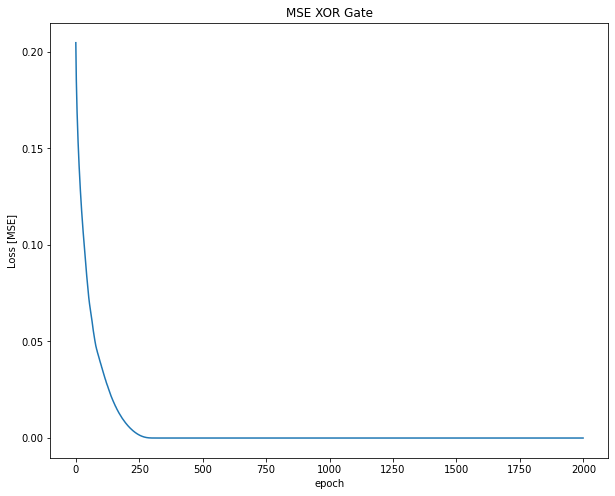

In [13]:
def plot_training_loss_hist(hist):
    fig = plt.figure(figsize=(10,8))
    plt.plot(hist['loss'])
    plt.title('MSE XOR Gate')
    plt.ylabel('Loss [MSE]')
    plt.xlabel('epoch')
    plt.show()
    
plot_training_loss_hist(result.history)

In [14]:
clf = result.model
clf.predict(X)

array([[0.        ],
       [0.99564004],
       [0.99630916],
       [0.        ]], dtype=float32)